In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [96]:
df=pd.read_csv("C:\\Users\\Srush\\Downloads\\Walmart_sales.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [97]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [98]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [99]:
unemployment_mean_by_store = df.groupby('Store')['Unemployment'].mean().reset_index()
unemployment_mean_by_store


,Store,Unemployment
0,1,7.610420
1,2,7.623846
2,3,7.176986
3,4,5.964692
4,5,6.295406
5,6,6.606902
6,7,8.585734
7,8,6.091846
8,9,6.099881
9,10,8.362965


In [100]:
weekly_highest_sales = df.groupby('Store')['Weekly_Sales'].max().reset_index()
weekly_highest_sales

,Store,Weekly_Sales
0,1,2387950.20
1,2,3436007.68
2,3,605990.41
3,4,3676388.98
4,5,507900.07
5,6,2727575.18
6,7,1059715.27
7,8,1511641.09
8,9,905324.68
9,10,3749057.69


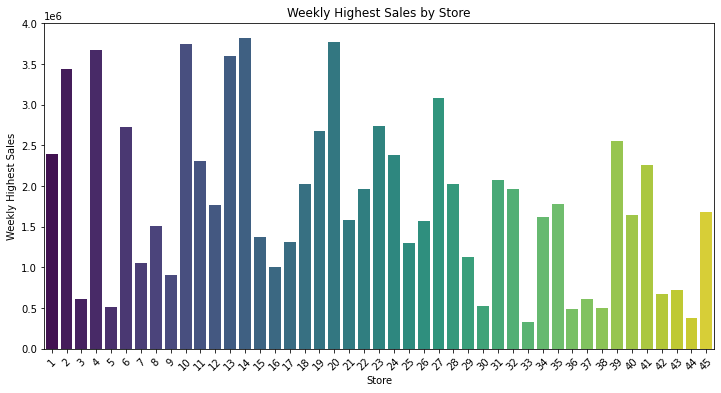

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_highest_sales, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Weekly Highest Sales by Store')
plt.xlabel('Store')
plt.xticks(rotation=45)
plt.ylabel('Weekly Highest Sales')
plt.show()

C:\Users\Srush\AppData\Local\Temp\ipykernel_20920\1974842676.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['Date'].dt.week


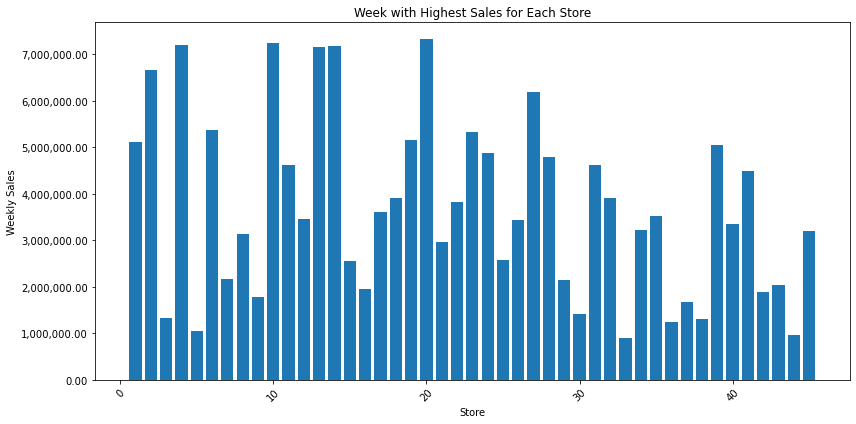

In [102]:
import matplotlib.ticker as ticker
plt.figure(figsize=(12, 6))
df['week_number'] = df['Date'].dt.week
weekly_sales_by_store = df.groupby(['Store', 'week_number'])['Weekly_Sales'].sum().reset_index()
max_sales_weeks = weekly_sales_by_store.loc[weekly_sales_by_store.groupby('Store')['Weekly_Sales'].idxmax()]
plt.bar(max_sales_weeks['Store'], max_sales_weeks['Weekly_Sales'])

plt.title('Week with Highest Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

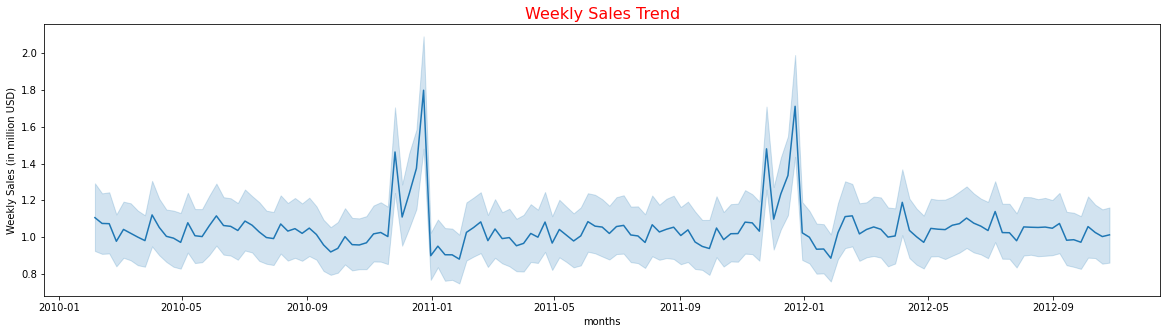

In [103]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

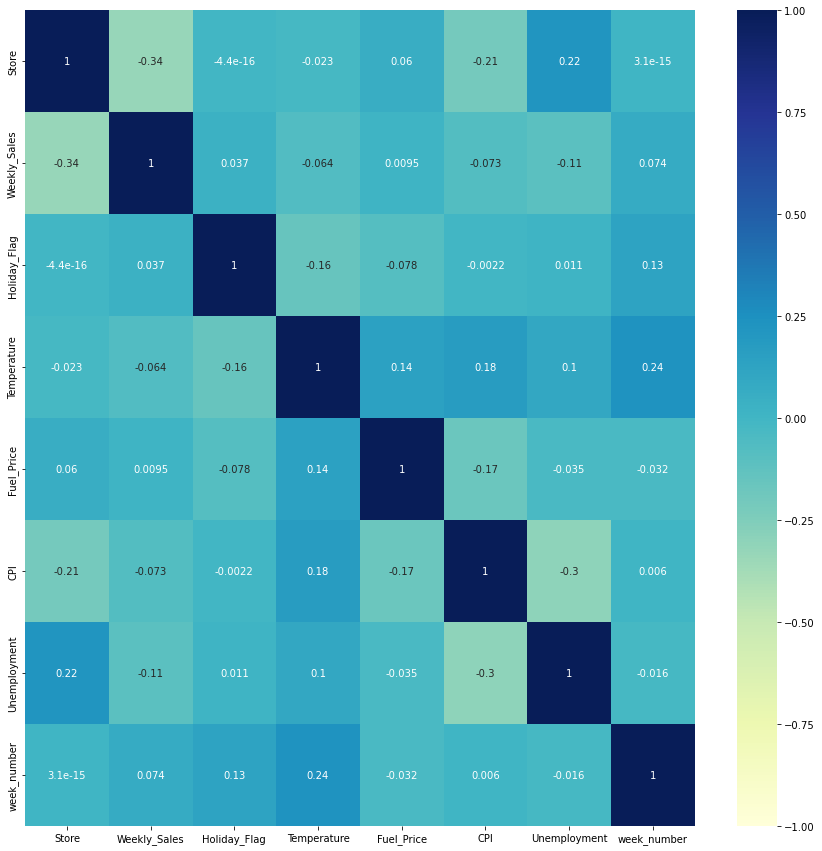

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [106]:
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Root Mean Square (RMS) Value
# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Construct a Decision Tree using the best parameters
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Root Mean Squared Error: 138094.6234869712


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [108]:
accuracy = best_tree.score(X_test, y_test)

print("Accuracy:", accuracy*100)

Accuracy: 94.00035592897991


In [109]:
def visualize_tree(regressor, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(regressor, feature_names=feature_names.tolist(), filled=True)
    plt.show()

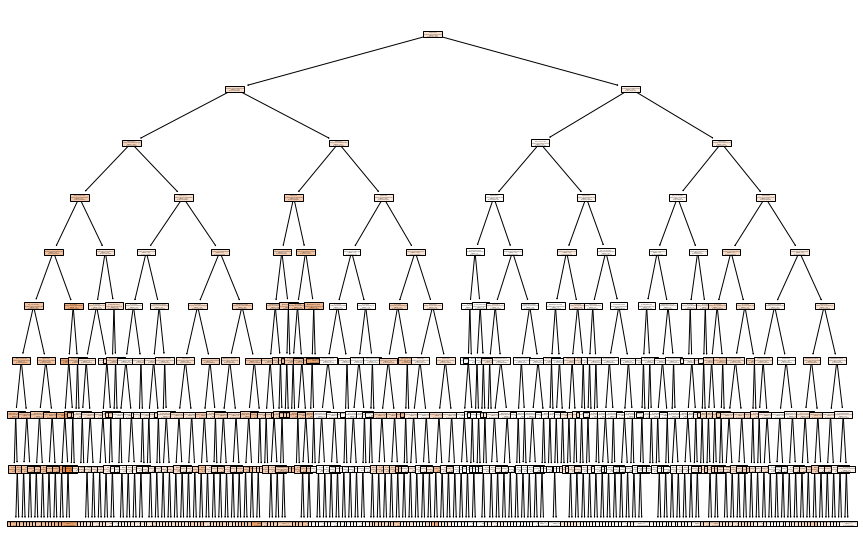

In [110]:

from sklearn.tree import plot_tree
visualize_tree(best_tree, df.columns[:-1])